In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import accuracy_score

In [8]:
df=pd.read_csv("sonar.csv",header=None)

In [9]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<AxesSubplot:>

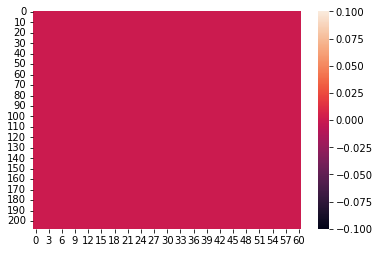

In [10]:
sns.heatmap(df.isnull())

In [12]:
df.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,NaN
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,NaN
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,NaN
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,NaN
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,NaN
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,NaN


In [13]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [16]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [18]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [21]:
x=df.drop(columns=60,axis=1)
y=df[60]

In [22]:
x.head(2)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044


In [23]:
y.head(2)

0    R
1    R
Name: 60, dtype: object

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
# accuracy on training data
x_train_pred=lr.predict(x_train)
trainng_data_acc=accuracy_score(x_train_pred,y_train)

In [28]:
trainng_data_acc

0.8342245989304813

In [29]:
x_test_pred=lr.predict(x_test)

In [30]:
test_data_acc=accuracy_score(x_test_pred,y_test)

In [31]:
test_data_acc

0.7619047619047619

In [47]:
# making prediction system
input_data=(0.0261,0.0266,0.0223,0.0749,0.1364,0.1513,0.1316,0.1654,0.1864,0.2013,0.2890,0.3650,0.3510,0.3495,0.4325,0.5398,0.6237,0.6876,0.7329,0.8107,0.8396,0.8632,0.8747,0.9607,0.9716,0.9121,0.8576,0.8798,0.7720,0.5711,0.4264,0.2860,0.3114,0.2066,0.1165,0.0185,0.1302,0.2480,0.1637,0.1103,0.2144,0.2033,0.1887,0.1370,0.1376,0.0307,0.0373,0.0606,0.0399,0.0169,0.0135,0.0222,0.0175,0.0127,0.0022,0.0124,0.0054,0.0021,0.0028,0.0023)
input_data_array=np.asarray(input_data)
#reshapeing because predicting for single instance
input_data_array_re=input_data_array.reshape(1,-1)
predict=lr.predict(input_data_array_re)
print(predict)

if (predict[0]=="R"):
    print("its a rock")
else:
    print("its a mine")

['M']
its a mine


In [48]:
t=df.drop([60],axis=1)